In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
from mpl_toolkits.mplot3d import Axes3D

In [19]:
%matplotlib inline

In [1292]:
R=2.4
c1 = 3 #Originally 3
c2 = 4.7 #Originally at 8.7
c3 = -.11

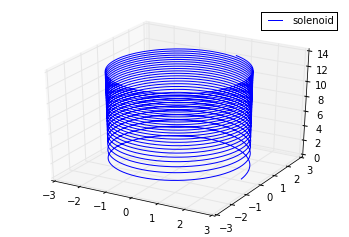

In [1293]:
fig = plt.figure()
ax = fig.gca(projection='3d')

p = np.linspace(0, 2 * np.pi, 5000)
z = p*13/(2*np.pi)
theta = c1*p + c2*p**2 + c3*p**3
x = R * np.cos(theta)
y = R * np.sin(theta)
r = np.sqrt(x**2 + y**2)

ax.plot(x, y, z, label='solenoid')
ax.legend()

plt.show()

In [1294]:
I = 0.5 #amps
mu = 1 #FIXME

In [1295]:
r_vec[2]

array([  0.00000000e+00,   2.60052010e-03,   5.20104021e-03, ...,
         1.29947990e+01,   1.29973995e+01,   1.30000000e+01])

In [1296]:
def B(zprime):
    B = 0
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        dy = y[i+1] - y[i]
        dz = z[i+1] - z[i]
        dp = p[i+1] - p[i]
        drdp = [dx/dp, dy/dp, dz/dp]
        r = [x[i],y[i],z[i]-zprime]
        r_mag = np.sqrt(x[i]**2 + y[i]**2 + (z[i]-zprime)**2)
        B += mu*I/(4*np.pi) * np.cross(drdp,r) / r_mag**3 * dp
    return B

In [1297]:
zplot = np.arange(0,13,0.1)
zplot

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
        10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
        11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
        12.6,  12.7,

In [1298]:
Blist = []
for i in np.arange(0,13,0.1):
    Blist.append(B(i))

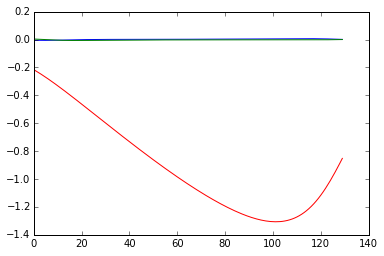

In [1299]:
plt.plot(Blist)